In [1]:
import numpy as np
import matplotlib.pyplot as plt

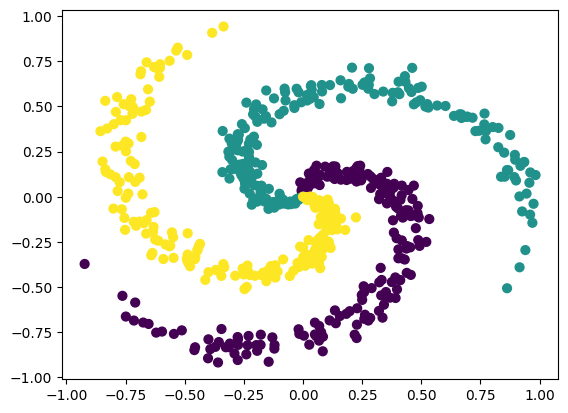

In [2]:
N = 200  # number of points per class
D = 2  # dimensionality
K = 3  # number of classes
X = np.zeros((N * K, D))  # data matrix (each row = single example)
y = np.zeros(N * K, dtype="uint8")  # class labels
for j in range(K):
    ix = range(N * j, N * (j + 1))
    r = np.linspace(0.0, 1, N)  # radius
    t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2  # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.viridis)
plt.show()

In [3]:
from data_classes.MLP import MLP

In [4]:
nn = MLP(2,[10,5,1])

In [5]:
epoch = 10
loss_list = []
for i in range(epoch):

    ## fw pass
    ypred = nn(X.T)
    loss = -sum(ypred.log() * y)

    loss_list.append(loss.data)

    ## Backprop
    loss.backward()

    ## Gradient Descent
    for p in nn.parameters():
        p.data += -0.01 * p.grad

AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA
AAAAAAAAAA

In [6]:
nn_t = MLP(2,[2,1])
X = np.array(
    [[0,0],
    [1,1],
    [1,0],
    [0,1]]
)
y = np.array(
    [0,1,0,1]
)

In [7]:
nn_t(X.T)

Value(data=[0.26029965 0.24931024 0.21004505 0.28034507],op=softmax)

In [8]:
ypred = nn_t(X.T)
loss = -sum(ypred.log() * y)

In [9]:
loss.backward()

In [10]:
y

array([0, 1, 0, 1])

In [11]:
nn.layers[0].neurons[0].w[0].grad

0

In [12]:
loss.backward()

In [13]:
loss

Value(data=2.660791267156344,op=*)

In [16]:
from graphviz import Digraph


def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()

    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)

    build(root)
    return nodes, edges


def draw_dot(root):
    dot = Digraph(format="svg", graph_attr={"rankdir": "LR"})  # LR = left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it

        if n.data.shape != ():
            def list_to_string(float_list):
                return '[' + ', '.join(format(f, '.2f') for f in float_list) + ']'
            
            dot.node(
                name=uid,
                label="{ %s | %s | %s }" % (n.label, list_to_string(n.data), list_to_string(n.grad)),
                shape="record",
            )
        else:
            dot.node(
            name=uid,
            label="{ %s | data %.4f | grad %.4f }" % (n.label, float(n.data), n.grad),
            shape="record",
        )
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name=uid + n._op, label=n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

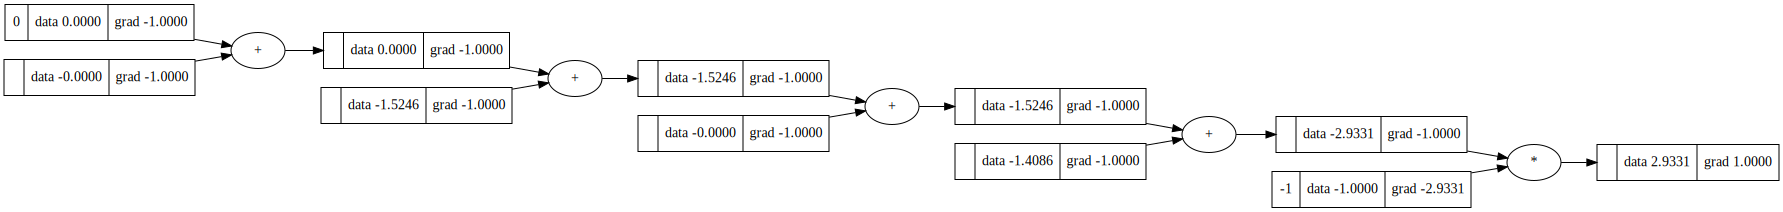

In [17]:
draw_dot(loss)

In [14]:
epoch = 50
loss_list = []
for i in range(epoch):

    ## fw pass
    ypred = nn(X.T)
    loss = -sum(ypred.log() * y)

    loss_list.append(loss.data)

    ## Backprop
    loss.backward()

    ## Gradient Descent
    for p in nn.parameters():
        p.data += -0.01 * p.grad

In [20]:
-sum(ypred.log() * y)

Value(data=2.933142261196638,op=*)

In [21]:
loss.backward()

In [19]:
nn.parameters()

[Value(data=0.8223312562951404,op=),
 Value(data=0.48288134082356793,op=),
 Value(data=0.3112100368934394,op=),
 Value(data=-0.2632772067209721,op=),
 Value(data=0.08722566811037624,op=),
 Value(data=-0.12578043564191077,op=),
 Value(data=-0.02666012893301173,op=),
 Value(data=0.3443846120579164,op=),
 Value(data=-0.9596670510390297,op=),
 Value(data=-0.6785240582879426,op=),
 Value(data=-0.6429718933806887,op=),
 Value(data=-0.9066441917385368,op=),
 Value(data=-0.2924264529691256,op=),
 Value(data=0.24354395442754662,op=),
 Value(data=-0.8255823349842633,op=),
 Value(data=0.6762444985703611,op=),
 Value(data=0.9550745207102171,op=),
 Value(data=-0.47425792006709266,op=),
 Value(data=0.8599024794507804,op=),
 Value(data=0.8162637578688923,op=),
 Value(data=0.5845782649055815,op=),
 Value(data=-0.7983441485094134,op=),
 Value(data=-0.004576569177620504,op=),
 Value(data=-0.5329670965613627,op=),
 Value(data=0.4849736279931596,op=),
 Value(data=-0.677558564158893,op=),
 Value(data=-0.57

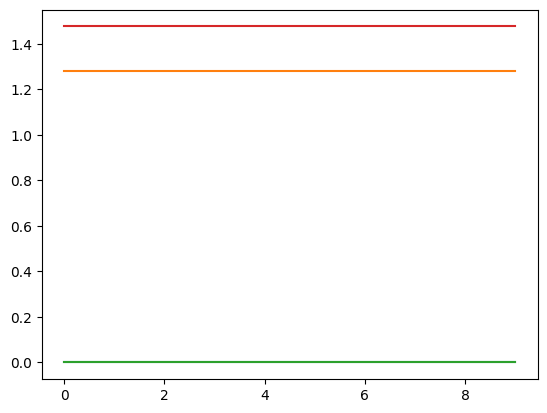

In [30]:
import matplotlib.pyplot as plt

plt.plot(loss_list)

In [8]:
loss_pre = y_pred.log() * y

In [9]:
sum(loss_pre)

-3838.1577744681167

In [5]:
y_pred = nn(X.T)
loss = sum(y * y_pred.log())

TypeError: 'numpy.float64' object is not iterable

In [29]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,